###cuML Setup

In [1]:
!nvidia-smi

Fri Dec  8 21:58:45 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P0    23W / 300W |      0MiB / 16384MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
# This get the RAPIDS-Colab install files and test check your GPU.  Run this and the next cell only.
# Please read the output of this cell.  If your Colab Instance is not RAPIDS compatible, it will warn you and give you remediation steps.
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!python rapidsai-csp-utils/colab/env-check.py

Cloning into 'rapidsai-csp-utils'...
remote: Enumerating objects: 400, done.
remote: Counting objects: 100% (131/131), done.
remote: Compressing objects: 100% (80/80), done.
remote: Total 400 (delta 95), reused 53 (delta 51), pack-reused 269
Receiving objects: 100% (400/400), 109.81 KiB | 1.13 MiB/s, done.
Resolving deltas: 100% (197/197), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 753.9 kB/s eta 0:00:00
***********************************************************************
Woo! Your instance has the right kind of GPU, a Tesla V100-SXM2-16GB!
We will now install RAPIDS via pip!  Please stand by, should be quick...
***********************************************************************



In [ ]:
# This will update the Colab environment and restart the kernel.  Don't run the next cell until you see the session crash.
!bash rapidsai-csp-utils/colab/update_gcc.sh
import os
os._exit(00)

Updating your Colab environment.  This will restart your kernel.  Don't Panic!
Found existing installation: cupy-cuda11x 11.0.0
Uninstalling cupy-cuda11x-11.0.0:
  Successfully uninstalled cupy-cuda11x-11.0.0
PPA publishes dbgsym, you may need to include 'main/debug' component
Repository: 'deb https://ppa.launchpadcontent.net/ubuntu-toolchain-r/test/ubuntu/ jammy main'
Description:
Toolchain test builds; see https://wiki.ubuntu.com/ToolChain

More info: https://launchpad.net/~ubuntu-toolchain-r/+archive/ubuntu/test
Adding repository.
Adding deb entry to /etc/apt/sources.list.d/ubuntu-toolchain-r-ubuntu-test-jammy.list
Adding disabled deb-src entry to /etc/apt/sources.list.d/ubuntu-toolchain-r-ubuntu-test-jammy.list
Adding key to /etc/apt/trusted.gpg.d/ubuntu-toolchain-r-ubuntu-test.gpg with fingerprint 60C317803A41BA51845E371A1E9377A2BA9EF27F
Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3

In [1]:
# This will install CondaColab.  This will restart your kernel one last time.  Run this cell by itself and only run the next cell once you see the session crash.
import condacolab
condacolab.install()

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.1.0-1/Mambaforge-23.1.0-1-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:09
🔁 Restarting kernel...


In [1]:
# you can now run the rest of the cells as normal
import condacolab
condacolab.check()

✨🍰✨ Everything looks OK!


In [2]:
# Installing RAPIDS is now 'python rapidsai-csp-utils/colab/install_rapids.py <release> <packages>'
# The <release> options are 'stable' and 'nightly'.  Leaving it blank or adding any other words will default to stable.
!python rapidsai-csp-utils/colab/install_rapids.py stable
import os
os.environ['NUMBAPRO_NVVM'] = '/usr/local/cuda/nvvm/lib64/libnvvm.so'
os.environ['NUMBAPRO_LIBDEVICE'] = '/usr/local/cuda/nvvm/libdevice/'
os.environ['CONDA_PREFIX'] = '/usr/local'

Found existing installation: cffi 1.15.1
Uninstalling cffi-1.15.1:
  Successfully uninstalled cffi-1.15.1
Found existing installation: cryptography 40.0.1
Uninstalling cryptography-40.0.1:
  Successfully uninstalled cryptography-40.0.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 446.3/446.3 kB 3.8 MB/s eta 0:00:00
Installing RAPIDS Stable 23.10
Starting the RAPIDS install on Colab.  This will take about 15 minutes.
Solving environment: ...working... done


==> WARNING: A newer version of conda exists. <==
  current version: 23.1.0
  latest version: 23.11.0

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.11.0



## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - mamba


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-

###Preprocessing

In [3]:
#Imports
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import cuml
import cupy as cp

In [4]:
#Import data
claims_text = pd.read_csv('/content/drive/MyDrive/CSCI567 Project/data/text_df_all.csv')
claims_text.head()

,claims,status
0,1-19. 20. The mutant endotoxin made accordin...,ISS
1,1-41. 42. An isolated peptide having an anti...,ISS
2,1-23. 24. An image processing device compris...,ABN
3,1-36. 37. The method of managing documents a...,ABN
4,1. A terminal comprising: a period reader read...,ISS


In [5]:
claims_text['status'].value_counts()

ISS    75833
ABN    37448
Name: status, dtype: int64

In [6]:
claims_text['claims'].sample(10)

42212     1. A method of transmitting feedback informati...
40227     1. A direct-type back light device, comprising...
10608     1. A base unit of an interactive device config...
52376     1. A method for providing an audio recording h...
94385     1. A two package curing type polyurethane coat...
11263     1. A method of preventing inner crown of remov...
107611    1. An organic electroluminescence (EL) device,...
49845     1. An analog-digital converter comprising: a f...
87347     1. In a washer comprising a drum holding a lau...
46261     1. An isolated crystalline form of monatin sel...
Name: claims, dtype: object

To deal with the numbering in the text, might be necessary to drop any entries with average word length/sentence length of 1.

In [7]:
#Creating a 'sentences' feature
claims_text['sentences'] = claims_text['claims'].apply(lambda x: x.split(". "))
claims_text['sentences'].head()

0    [1-19,   20, The mutant endotoxin made accordi...
1    [1-41,   42, An isolated peptide having an ant...
2    [1-23,   24, An image processing device compri...
3    [1-36,   37, The method of managing documents ...
4    [1, A terminal comprising: a period reader rea...
Name: sentences, dtype: object

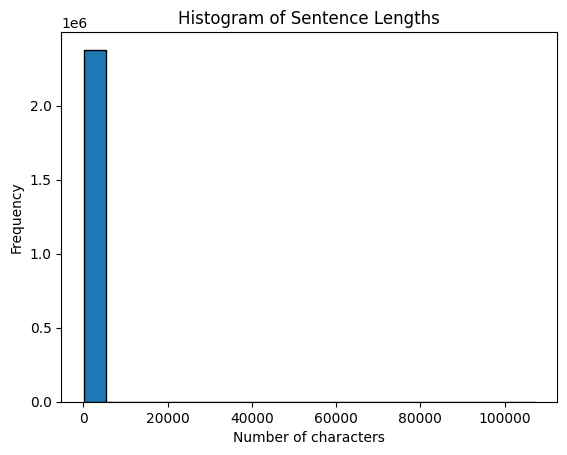

In [8]:
#Histogram of number of characters in each sentence

#Flatten the list of sentences into a single list of all sentences
all_sentences = [sentence for sublist in claims_text['sentences'] for sentence in sublist]

#Calculate the length of each sentence
sentence_lengths = [len(sentence) for sentence in all_sentences]
sentence_lengths.sort()

#Plot the histogram of sentence lengths
plt.hist(sentence_lengths[3000000:5500000], bins=20, edgecolor='black')
plt.title('Histogram of Sentence Lengths')
plt.xlabel('Number of characters')
plt.ylabel('Frequency')

#Show the plot
plt.show()

Based on histograms, it seems necessary to drop any sentences with less than 50 characters or greater than 1000 characters

In [9]:
#Filtering out all sentences shorter than 50 characters or longer than 1000 characters
def filter_sentences(sentences_list):
  return [s for s in sentences_list if 50 <= len(s) <= 1000]

claims_text['sentences'] = claims_text['sentences'].apply(filter_sentences)

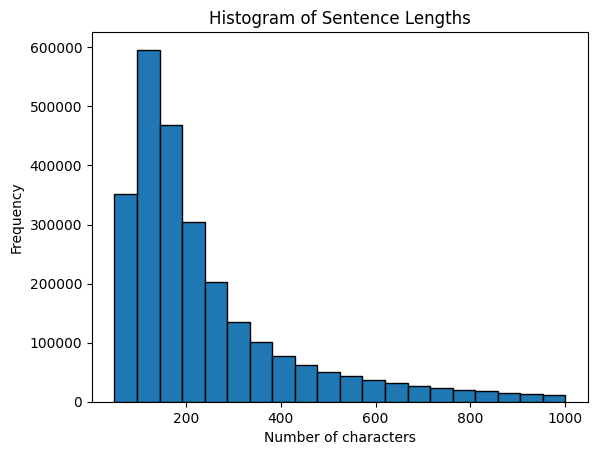

In [10]:
#Replotting this histogram

#Flatten the list of sentences into a single list of all sentences
all_sentences = [sentence for sublist in claims_text['sentences'] for sentence in sublist]

#Calculate the length of each sentence
sentence_lengths = [len(sentence) for sentence in all_sentences]
sentence_lengths.sort()

#Plot the histogram of sentence lengths
plt.hist(sentence_lengths, bins=20, edgecolor='black')
plt.title('Histogram of Sentence Lengths')
plt.xlabel('Number of characters')
plt.ylabel('Frequency')

#Show the plot
plt.show()

In [11]:
#Testing if they are real sentences
all_sentences.sort(key = len)
print(sentence_lengths[:10])
print(all_sentences[:10])

[50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
['The method of claim 33, wherein the histone is H2B', 'providing particles of a semiconductor material; b', 'providing particles of a semiconductor material; b', "The device is placed anywhere on the child's body.", '15, or (iii) a complementary strand of (i) or (ii)', 'The method of claim 1, wherein payment is provided', 'A vector comprising the nucleic acid of claim 1 14', 'locating the uterine artery with the sensor; and d', 'putting the new MAC-hs PDU ready to be transmitted', 'An antibody of claim 14 that is human or humanized']


In [12]:
def sentences_to_words(sentences_list):
    # Split each sentence into words, strip whitespaces, and filter out empty words
    return [
        [word for word in sentence.split() if word]  # split() handles multiple spaces
        for sentence in sentences_list
    ]

# Apply the function to each row's 'sentences' column
claims_text['word_lists'] = claims_text['sentences'].apply(sentences_to_words)

# Display the head of the new 'word_lists' column
print(claims_text['word_lists'].head())

0    [[The, mutant, endotoxin, made, according, to,...
1    [[An, isolated, peptide, having, an, antigenic...
2    [[The, method, according, to, claim, 27,, wher...
3    [[The, method, of, managing, documents, and, m...
4    [[A, terminal, comprising:, a, period, reader,...
Name: word_lists, dtype: object


Some claims texts seem to be just one long sentence. They will be dropped from the dataset

In [13]:
#Drop entries with an empty list of sentences
claims_text = claims_text[claims_text['sentences'].apply(lambda x: len(x) > 0)]

#Find entries with an empty list of sentences
empty_entries = claims_text[claims_text['sentences'].apply(lambda x: len(x) == 0)]

#Display the empty entries
len(empty_entries)

0

In [14]:
#Calculate the average number of words per sentence for each entry
claims_text['average_num_words'] = claims_text['word_lists'].apply(lambda x: sum(len(sentence) for sentence in x) / len(x))
claims_text['average_num_words'].head()

0     49.400000
1     22.695652
2     45.200000
3     43.142857
4    100.000000
Name: average_num_words, dtype: float64

In [15]:
#Calculating the average word length in each claim
def average_word_length(word_lists):
    total_length = sum(len(word) for sentence in word_lists for word in sentence)
    total_words = sum(len(sentence) for sentence in word_lists)
    return total_length / total_words if total_words > 0 else 0

#Apply the function to calculate the average word length for each entry
claims_text['average_word_length'] = claims_text['word_lists'].apply(average_word_length)

claims_text['average_word_length'].head()

0    6.412955
1    5.076628
2    5.216814
3    5.463576
4    5.378800
Name: average_word_length, dtype: float64

In [16]:
#Calculating number of unique words in each claim
def unique_word_count(word_lists):
    # Flatten the list of lists of words and use a set to find unique words
    unique_words = set(word for sentence in word_lists for word in sentence)
    return len(unique_words)

# Apply the function to calculate the number of unique words for each entry
claims_text['unique_word_count'] = claims_text['word_lists'].apply(unique_word_count)

claims_text['unique_word_count'].head()

0     76
1    136
2     69
3     72
4    199
Name: unique_word_count, dtype: int64

In [17]:
#Calculating number of sentences in each claim
claims_text['num_sentences'] = claims_text['sentences'].apply(lambda x: len(x))
claims_text['num_sentences'].head()

0     5
1    23
2     5
3     7
4    25
Name: num_sentences, dtype: int64

In [18]:
claims_text.head()

,claims,status,sentences,word_lists,average_num_words,average_word_length,unique_word_count,num_sentences
0,1-19. 20. The mutant endotoxin made accordin...,ISS,[The mutant endotoxin made according to the me...,"[[The, mutant, endotoxin, made, according, to,...",49.400000,6.412955,76,5
1,1-41. 42. An isolated peptide having an anti...,ISS,[An isolated peptide having an antigenic seque...,"[[An, isolated, peptide, having, an, antigenic...",22.695652,5.076628,136,23
2,1-23. 24. An image processing device compris...,ABN,"[The method according to claim 27, wherein the...","[[The, method, according, to, claim, 27,, wher...",45.200000,5.216814,69,5
3,1-36. 37. The method of managing documents a...,ABN,[The method of managing documents and messages...,"[[The, method, of, managing, documents, and, m...",43.142857,5.463576,72,7
4,1. A terminal comprising: a period reader read...,ISS,[A terminal comprising: a period reader readin...,"[[A, terminal, comprising:, a, period, reader,...",100.000000,5.378800,199,25


###EDA/Preprocessing

In [157]:
#Taking numerical metadata features and target feature
linguistic_metadata = claims_text[['average_num_words', 'average_word_length', 'unique_word_count', 'num_sentences', 'status']]
linguistic_metadata.describe()

,average_num_words,average_word_length,unique_word_count,num_sentences
count,112831.000000,112831.000000,112831.000000,112831.000000
mean,42.866651,5.245552,141.593481,22.955916
std,17.177022,0.518753,62.624701,19.791504
min,1.500000,2.779365,3.000000,1.000000
25%,31.135135,4.968486,102.000000,11.000000
50%,39.250000,5.201175,131.000000,19.000000
75%,50.388889,5.458019,168.000000,28.000000
max,174.000000,71.500000,1153.000000,1280.000000


In [174]:
linguistic_metadata.corr()

,average_num_words,average_word_length,unique_word_count,num_sentences,status
average_num_words,1.000000,-0.049775,-0.020002,-0.297871,0.101675
average_word_length,-0.049775,1.000000,0.093172,0.068377,-0.034953
unique_word_count,-0.020002,0.093172,1.000000,0.699461,0.008967
num_sentences,-0.297871,0.068377,0.699461,1.000000,-0.000345
status,0.101675,-0.034953,0.008967,-0.000345,1.000000


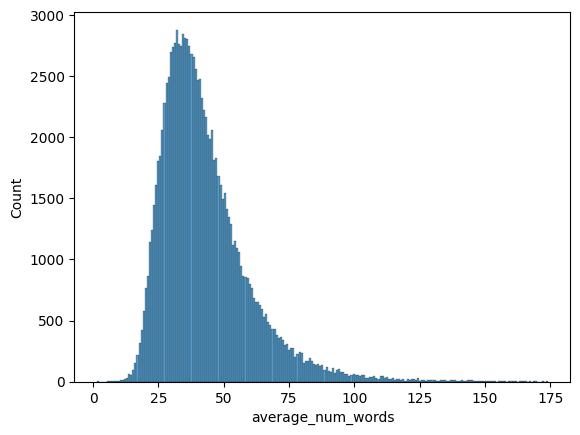

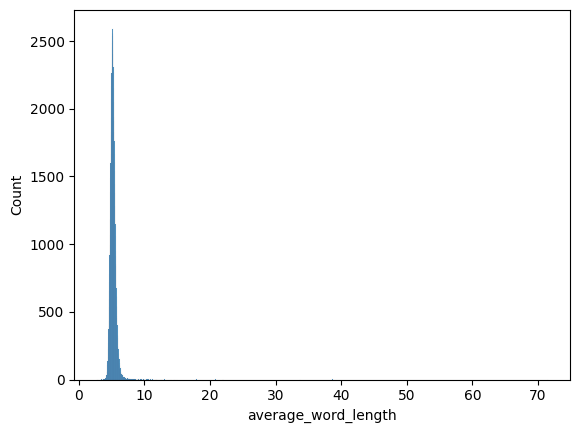

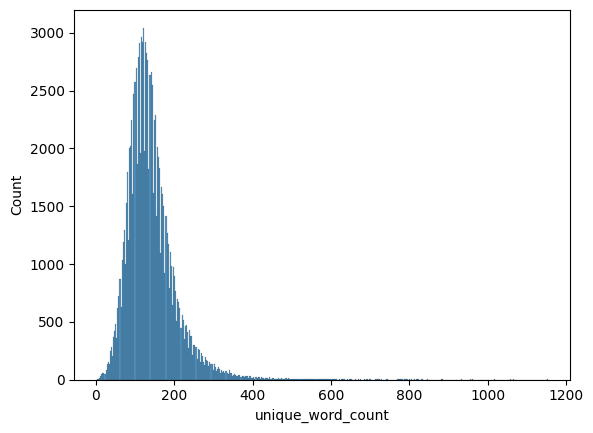

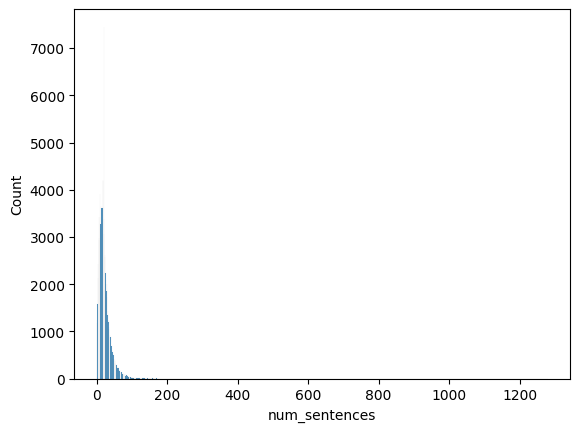

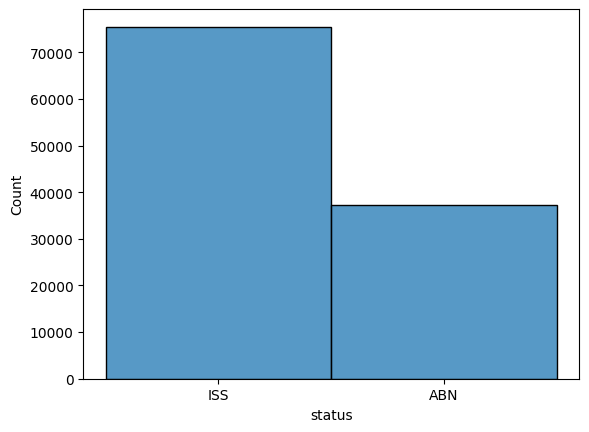

In [158]:
#Printing out histograms for numerical features
for feature in linguistic_metadata.columns:
  sns.histplot(linguistic_metadata[feature])
  plt.show()

In [159]:
#Applying a Winsorizer to the dataset to reduce the effect of extreme outliers
features_to_winsorize = ['average_num_words', 'average_word_length', 'unique_word_count', 'num_sentences']

#Apply Winsorizing to specified features
for feature in features_to_winsorize:
    lower_quartile = linguistic_metadata[feature].quantile(0.01)
    upper_quartile = linguistic_metadata[feature].quantile(0.99)
    linguistic_metadata[feature] = linguistic_metadata[feature].clip(lower=lower_quartile, upper=upper_quartile)

linguistic_metadata.describe()

<ipython-input-159-1bd67778d31b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  linguistic_metadata[feature] = linguistic_metadata[feature].clip(lower=lower_quartile, upper=upper_quartile)
<ipython-input-159-1bd67778d31b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  linguistic_metadata[feature] = linguistic_metadata[feature].clip(lower=lower_quartile, upper=upper_quartile)
<ipython-input-159-1bd67778d31b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

,average_num_words,average_word_length,unique_word_count,num_sentences
count,112831.000000,112831.000000,112831.000000,112831.000000
mean,42.704071,5.236522,140.799612,22.545657
std,16.313762,0.395812,57.784513,16.666173
min,18.467483,4.423890,40.000000,1.000000
25%,31.135135,4.968486,102.000000,11.000000
50%,39.250000,5.201175,131.000000,19.000000
75%,50.388889,5.458019,168.000000,28.000000
max,103.000000,6.601254,351.000000,93.000000


**Write now data is being capped at high end and low end. Might change to just high end**

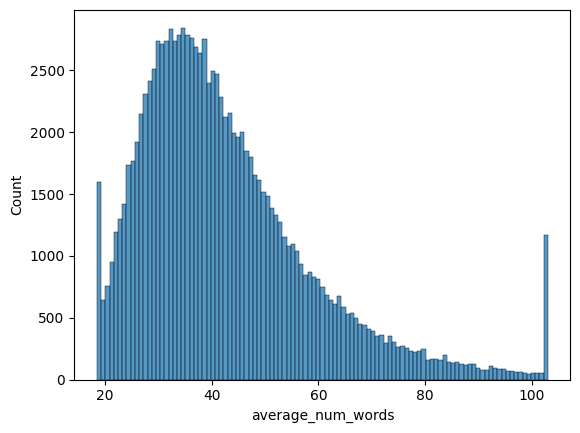

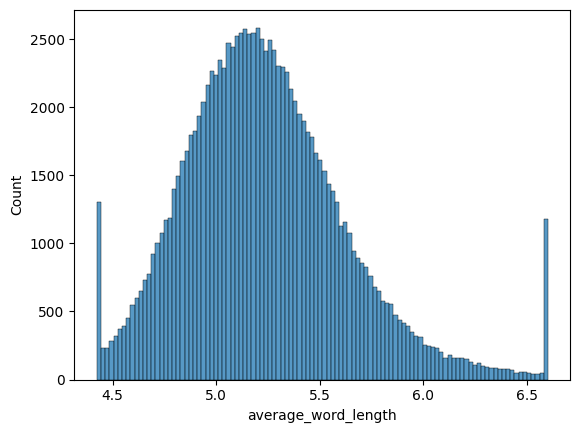

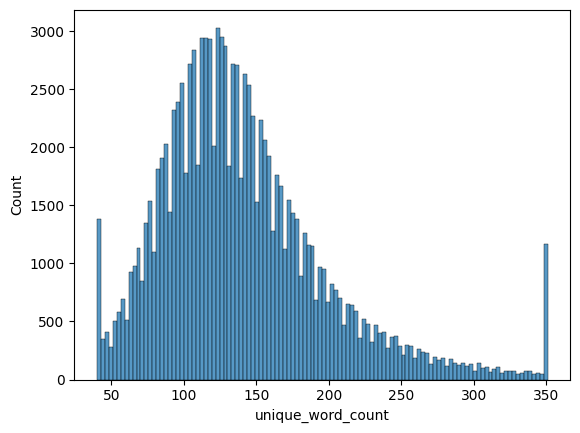

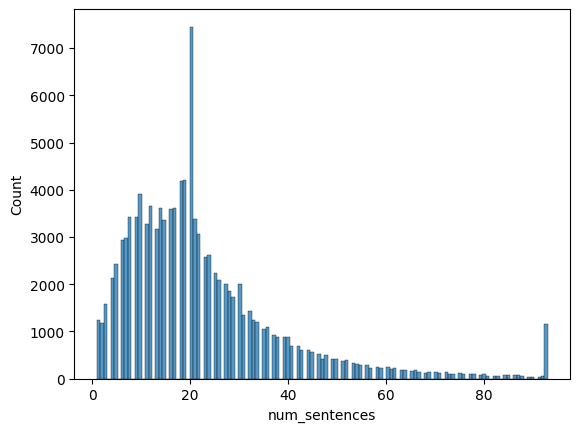

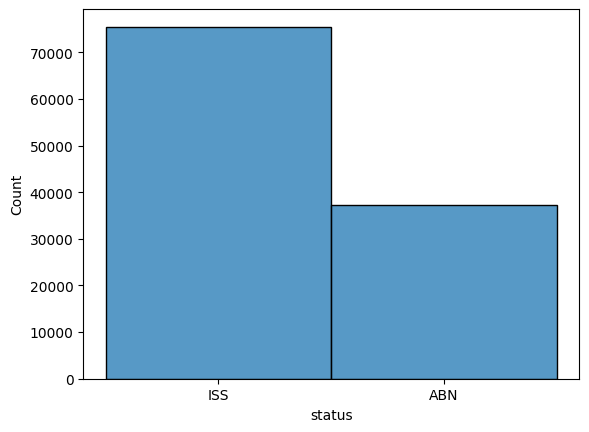

In [160]:
#Printing out histograms for numerical features
for feature in linguistic_metadata.columns:
  sns.histplot(linguistic_metadata[feature])
  plt.show()

Winsorizer at 0.1 and 99.9th percentils to remove extreme outliers

In [161]:
#Encoding target feature
linguistic_metadata['status'] = linguistic_metadata['status'].replace({'ISS': 1, 'ABN': 0})
linguistic_metadata['status'].value_counts()

<ipython-input-161-16c694eae444>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  linguistic_metadata['status'] = linguistic_metadata['status'].replace({'ISS': 1, 'ABN': 0})


1    75501
0    37330
Name: status, dtype: int64

In [162]:
#Splitting into train and test (not shuffling to keep data sequential)
from sklearn.model_selection import train_test_split

X = linguistic_metadata.drop('status', axis=1)
y = linguistic_metadata['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = False)

In [163]:
#Scaling data using Robust Scaler (more resistant to outliers)
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

In [164]:
X_train.describe()

,average_num_words,average_word_length,unique_word_count,num_sentences
count,90264.000000,9.026400e+04,90264.000000,90264.000000
mean,0.177569,7.134738e-02,0.152590,0.199856
std,0.849118,8.077385e-01,0.880364,1.000958
min,-1.085139,-1.593251e+00,-1.409091,-1.117647
25%,-0.422798,-4.749314e-01,-0.439394,-0.470588
50%,0.000000,9.088981e-16,0.000000,0.000000
75%,0.577202,5.250686e-01,0.560606,0.529412
max,3.382385,2.863068e+00,3.303030,4.294118


###Model Training and Evaluation

In [165]:
#Training and evluating XGBoost
from xgboost import XGBClassifier

xgb = XGBClassifier(device = 'cuda')
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1: {f1:.4f}')

[22:35:42] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1697049450106/work/src/learner.cc:767: 
Parameters: { "device" } are not used.

Accuracy: 0.6657
Precision: 0.6794
Recall: 0.9528
F1: 0.7932


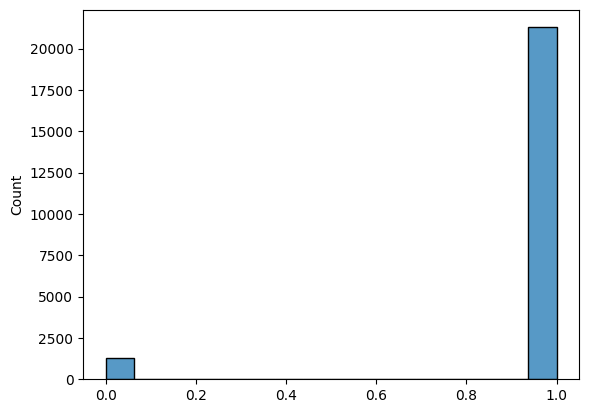

In [166]:
sns.histplot(y_pred)
plt.show()

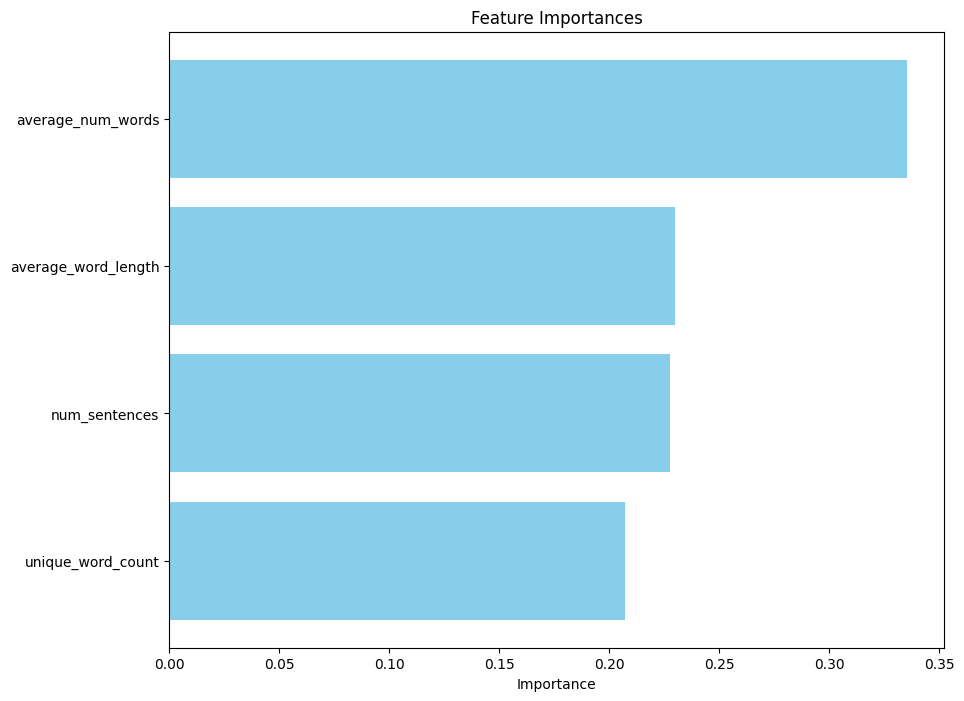

In [167]:
#Plotting feature importances
importances = xgb.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for feature importances
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the features by importance
feature_importances_sorted = feature_importances.sort_values(by='Importance', ascending=True)

# Creating the bar plot
plt.figure(figsize=(10, 8))
plt.barh(feature_importances_sorted['Feature'], feature_importances_sorted['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

In [168]:
#Converting datasets to cuML format to train cuML algorithms
import cudf

def convert_to_cuml_format(X_train, y_train, X_test, y_test):

    X_train_cuml = cudf.DataFrame.from_pandas(X_train)
    y_train_cuml = cudf.Series(y_train.values)
    X_test_cuml = cudf.DataFrame.from_pandas(X_test)
    y_test_cuml = cudf.Series(y_test.values)

    return X_train_cuml, y_train_cuml, X_test_cuml, y_test_cuml

X_train, y_train, X_test, y_test = convert_to_cuml_format(X_train, y_train, X_test, y_test)

In [169]:
#Training and evaluating SVM with Gaussian kernel
from cuml.svm import SVC

svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test.to_numpy(), y_pred.to_numpy())
precision = precision_score(y_test.to_numpy(), y_pred.to_numpy())
recall = recall_score(y_test.to_numpy(), y_pred.to_numpy())
f1 = f1_score(y_test.to_numpy(), y_pred.to_numpy())

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1: {f1:.4f}')

Accuracy: 0.6728
Precision: 0.6728
Recall: 1.0000
F1: 0.8044


In [170]:
#Training and evaluating Logistic Regression classifier
from cuml.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

accuracy = accuracy_score(y_test.to_numpy(), y_pred.to_numpy())
precision = precision_score(y_test.to_numpy(), y_pred.to_numpy())
recall = recall_score(y_test.to_numpy(), y_pred.to_numpy())
f1 = f1_score(y_test.to_numpy(), y_pred.to_numpy())

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1: {f1:.4f}')

Accuracy: 0.6728
Precision: 0.6728
Recall: 0.9998
F1: 0.8043


In [172]:
#Training and evaluating Random ForestClassifier
from cuml.ensemble import RandomForestClassifier


rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test.to_numpy(), y_pred.to_numpy())
precision = precision_score(y_test.to_numpy(), y_pred.to_numpy())
recall = recall_score(y_test.to_numpy(), y_pred.to_numpy())
f1 = f1_score(y_test.to_numpy(), y_pred.to_numpy())

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1: {f1:.4f}')

/usr/local/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: To use pickling first train using float32 data to fit the estimator
  ret = func(*args, **kwargs)


Accuracy: 0.6611
Precision: 0.6762
Recall: 0.9522
F1: 0.7908
